## Importing Libraries

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_percentage_error

## Loading and Exploring the Data

In [73]:
df = pd.read_csv('data/CostoPersonalesSeguros.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [76]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [77]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

## Data Cleaning and Preparation

In [79]:
lbl_enc = LabelEncoder()
df['sex'] = lbl_enc.fit_transform(df['sex'])
df['region'] = lbl_enc.fit_transform(df['region'])

In [80]:
temp = {
    'yes':1,
    'no':0
}

In [81]:
df['smoker'] = df['smoker'].replace(temp)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9872\3749564222.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace(temp)


In [82]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='charges'),df['charges'],test_size=0.3)

## Funcions

In [83]:
metrics_list = []
def metrics(model, y_test, predictions):
    rmse = root_mean_squared_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test,predictions)
    r2 = r2_score(y_test, predictions)
    metrics_list.append([model.__class__.__qualname__,rmse,mape,r2])

In [84]:
def scatter_plot(y_test, predictions, model):
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, predictions, color='blue', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea diagonal
    plt.title(f'Scatter Plot - {model.__class__.__qualname__}')
    plt.xlabel('True Values')
    plt.ylabel('Predict Values')
    plt.grid(True)
    plt.show()

In [85]:
def residual_plot(y_test,predictions, model):
    residuos = [real - pred for real, pred in zip(y_test, predictions)]
    
    plt.figure(figsize=(8, 4))
    plt.scatter(predictions, residuos, color='blue', alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residual plot  - {model.__class__.__qualname__}')
    plt.xlabel('Predict Values')
    plt.ylabel('Scraps')
    plt.grid(True)
    plt.show()

## LinearRegression

In [86]:
lnlreg = LinearRegression()

lnlreg.fit(x_train,y_train)
predictions_1 = lnlreg.predict(x_test)
metrics(lnlreg, y_test,predictions_1)

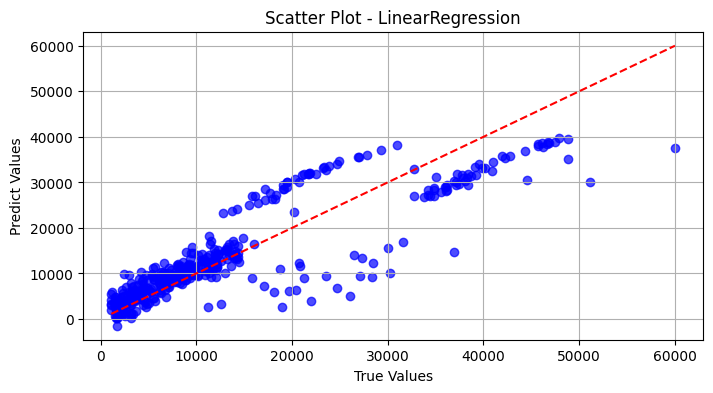

In [87]:
scatter_plot(y_test, predictions_1, lnlreg)

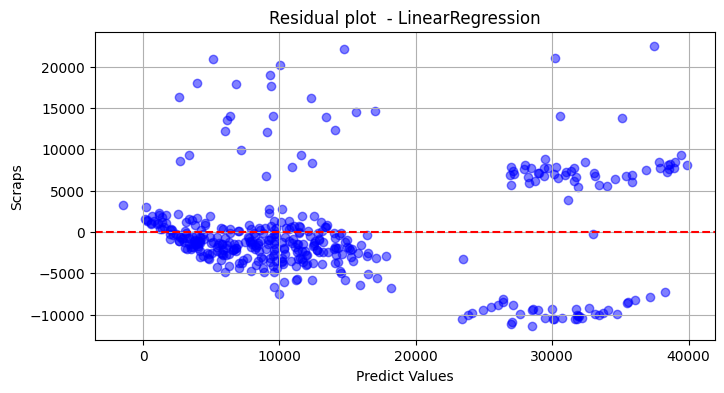

In [88]:
residual_plot(y_test,predictions_1, lnlreg)

## Lasso

In [89]:
lasso = Lasso()

lasso.fit(x_train,y_train)
predictions_2 = lasso.predict(x_test)
metrics(lasso, y_test,predictions_2)

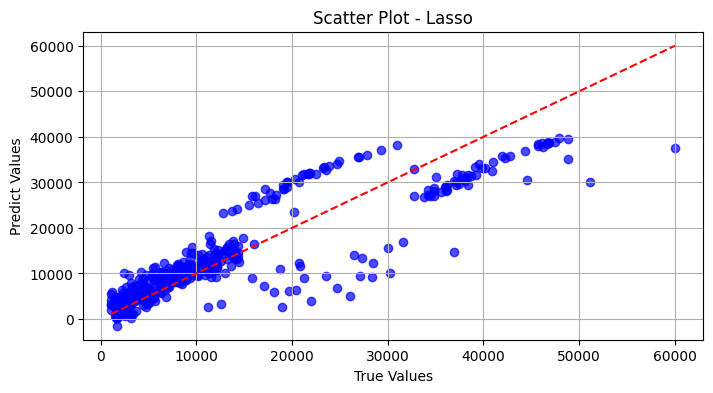

In [90]:
scatter_plot(y_test, predictions_2, lasso)

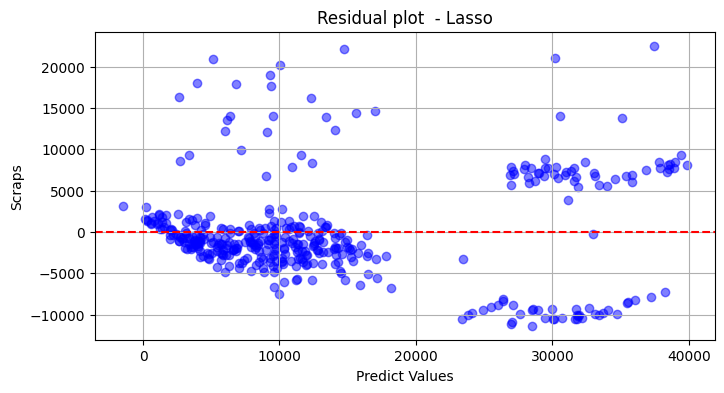

In [91]:
residual_plot(y_test,predictions_2, lasso)

## Metrics

In [92]:
pd.DataFrame(metrics_list,columns=['model','rmse','mape','r2'])

,model,rmse,mape,r2
0,LinearRegression,6006.706131,0.430187,0.768936
1,Lasso,6006.694553,0.430337,0.768937
